<a href="https://colab.research.google.com/github/BernardoRMendes/Projeto/blob/main/Correla%C3%A7%C3%A3o_Impl%C3%ADcita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
!pip install yahooquery
from yahooquery import Ticker
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
!pip install gspread

Nesse estudo iremos analisar o indicador de Correlação Implícita como ferramenta para avaliação de risco. Como eu não tenho acesso a dados históricos de volatilidade implícita, vou considerar a volatilidade realizada dos últimos 20 períodos para cada papel. Além disso, considerei que os papéis possuem o mesmo peso no índice.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CorrelacaoImplicita.jpg to CorrelacaoImplicita (3).jpg


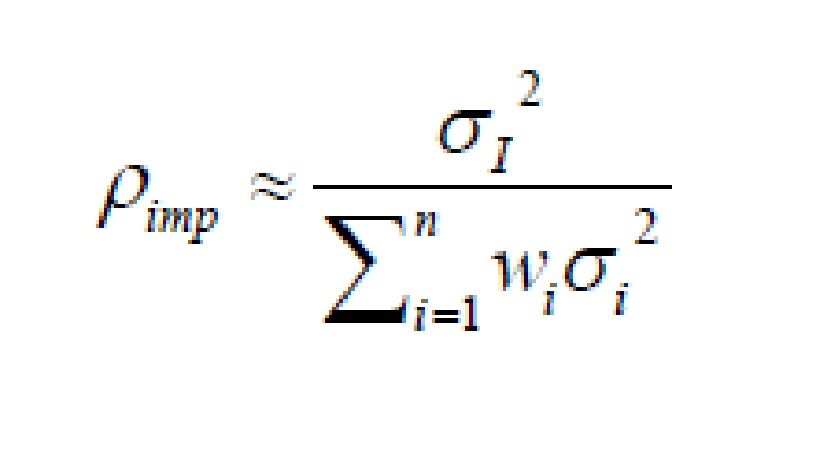

-1

In [3]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('CorrelacaoImplicita (2).jpg')
cv2_imshow(img)
cv2.waitKey()

O Numerador representa a Volatilidade Implícita do Índice ao quadrado, e o Denominador é a soma da multiplicação dos pesos e Volatilidade Implícita ao quadrado de cada papel.

Essa fórmula considera algumas simplificações, como supor que as correlações implícitas entre os papéis são iguais.

In [4]:
ibov=["ABEV3.SA","AZUL4.SA","B3SA3.SA","BBAS3.SA","BBDC3.SA","BBDC4.SA","BBSE3.SA","BEEF3.SA","BPAC11.SA","BRAP4.SA","BRDT3.SA","BRFS3.SA","BRKM5.SA","BRML3.SA","BTOW3.SA","CCRO3.SA","CIEL3.SA","CMIG4.SA","COGN3.SA","CPFE3.SA","CPLE6.SA","CRFB3.SA","CSAN3.SA","CSNA3.SA","CVCB3.SA","CYRE3.SA","ECOR3.SA","EGIE3.SA","ELET3.SA","ELET6.SA","EMBR3.SA","ENBR3.SA","ENEV3.SA","ENGI11.SA","EQTL3.SA","EZTC3.SA","FLRY3.SA","GGBR4.SA","GNDI3.SA","GOAU4.SA","GOLL4.SA","HAPV3.SA","HGTX3.SA","HYPE3.SA","IGTA3.SA","IRBR3.SA","ITSA4.SA","ITUB4.SA","JBSS3.SA","JHSF3.SA","KLBN11.SA","LAME4.SA","LCAM3.SA","LREN3.SA","MGLU3.SA","MRFG3.SA","MRVE3.SA","MULT3.SA","NTCO3.SA","PCAR3.SA","PETR3.SA","PETR4.SA","PRIO3.SA","QUAL3.SA","RADL3.SA","RAIL3.SA","RENT3.SA","SANB11.SA","SBSP3.SA","SULA11.SA","SUZB3.SA","TAEE11.SA","TIMS3.SA","TOTS3.SA","UGPA3.SA","USIM5.SA","VALE3.SA","VIVT3.SA","VVAR3.SA","WEGE3.SA","YDUQ3.SA"]

In [5]:
stocks=pd.DataFrame()
i=np.arange(len(ibov))
for i in i:
  try:
    a=Ticker(ibov[i])
    df=a.history(start="2018-02-22",end="2021-01-22",interval='1d')
    df=df['adjclose']
    df=df.pct_change().rolling(20).std()
    df=df.droplevel("symbol")
    stocks[ibov[i]]=df
  except:
    pass

In [6]:
stocks

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CPFE3.SA,CPLE6.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,ENEV3.SA,ENGI11.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,...,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,JHSF3.SA,KLBN11.SA,LAME4.SA,LCAM3.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PCAR3.SA,PETR3.SA,PETR4.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,0.022520,0.035353,0.020886,0.020941,0.019264,0.019658,0.016086,0.021770,0.019679,0.026714,0.011640,0.015692,0.024584,0.022340,0.031339,0.020198,0.029799,0.020163,0.023125,0.021134,0.023915,0.020460,0.025878,0.035452,0.031394,0.024511,0.020510,0.016732,0.021658,0.019314,0.038775,0.015561,0.024986,0.020931,0.018408,0.025003,0.019574,0.033487,0.063047,0.027620,...,0.048902,0.022324,0.026236,0.023514,0.033817,0.017855,0.019631,0.016408,0.024691,0.023201,0.029295,0.025142,0.027583,0.020654,0.018382,0.027724,0.022165,0.028244,0.019529,0.021196,0.022715,0.035367,0.018834,0.017831,0.020122,0.028538,0.019283,0.020521,0.017587,0.028006,0.011813,NaN,0.024262,0.018942,0.033591,0.024876,0.012340,0.021493,0.028324,0.026078
2021-01-18,0.022365,0.035550,0.020974,0.021140,0.019292,0.019684,0.016675,0.021770,0.019481,0.026621,0.011044,0.016136,0.025873,0.022543,0.031390,0.019927,0.029992,0.021196,0.023067,0.018339,0.024333,0.020745,0.022853,0.035104,0.031831,0.023954,0.020606,0.017062,0.021237,0.019040,0.038580,0.015968,0.025048,0.021694,0.018941,0.025013,0.019273,0.032442,0.062970,0.026795,...,0.048966,0.020959,0.023348,0.023901,0.033799,0.017514,0.019727,0.016189,0.0

In [7]:
stocks.isnull().sum()

ABEV3.SA    20
AZUL4.SA    20
B3SA3.SA    20
BBAS3.SA    20
BBDC3.SA    20
            ..
VALE3.SA    20
VIVT3.SA    20
VVAR3.SA    20
WEGE3.SA    20
YDUQ3.SA    20
Length: 81, dtype: int64

In [8]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 2018-02-22 to 2021-01-21
Data columns (total 81 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   699 non-null    float64
 1   AZUL4.SA   699 non-null    float64
 2   B3SA3.SA   699 non-null    float64
 3   BBAS3.SA   699 non-null    float64
 4   BBDC3.SA   699 non-null    float64
 5   BBDC4.SA   699 non-null    float64
 6   BBSE3.SA   699 non-null    float64
 7   BEEF3.SA   699 non-null    float64
 8   BPAC11.SA  699 non-null    float64
 9   BRAP4.SA   699 non-null    float64
 10  BRDT3.SA   699 non-null    float64
 11  BRFS3.SA   699 non-null    float64
 12  BRKM5.SA   699 non-null    float64
 13  BRML3.SA   699 non-null    float64
 14  BTOW3.SA   699 non-null    float64
 15  CCRO3.SA   699 non-null    float64
 16  CIEL3.SA   699 non-null    float64
 17  CMIG4.SA   699 non-null    float64
 18  COGN3.SA   699 non-null    float64
 19  CPFE3.SA   699 non-null    float64
 20 

In [9]:
stocks.drop(columns=["GNDI3.SA","HAPV3.SA","NTCO3.SA","TIMS3.SA","PCAR3.SA"],axis=1,inplace=True)

In [10]:
stocks.dropna(axis=0,inplace=True)

In [11]:
stocks

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CPFE3.SA,CPLE6.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,ENEV3.SA,ENGI11.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,GGBR4.SA,GOAU4.SA,GOLL4.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,JHSF3.SA,KLBN11.SA,LAME4.SA,LCAM3.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PETR3.SA,PETR4.SA,PRIO3.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-22,0.011204,0.017164,0.016707,0.012329,0.015346,0.012213,0.011271,0.022260,0.011355,0.018502,0.015010,0.054205,0.013733,0.016274,0.030754,0.038831,0.017909,0.019507,0.014326,0.007509,0.017298,0.016896,0.019295,0.032504,0.014415,0.012245,0.026276,0.010506,0.026364,0.029205,0.026741,0.015275,0.006782,0.014436,0.012341,0.014906,0.019319,0.027222,0.022104,0.028569,0.013987,0.017911,0.012329,0.018531,0.011563,0.013026,0.023497,0.034692,0.009949,0.016252,0.023260,0.015683,0.030310,0.024624,0.016817,0.013480,0.018794,0.021458,0.046473,0.034243,0.014870,0.018120,0.022730,0.011675,0.011722,0.015466,0.055025,0.011979,0.009207,0.010123,0.027635,0.018657,0.015339,0.020180,0.013402,0.028264
2018-03-23,0.009918,0.017549,0.016029,0.012409,0.015645,0.012104,0.013244,0.021772,0.011180,0.018287,0.015091,0.051594,0.013093,0.016077,0.031774,0.038783,0.017211,0.018909,0.015944,0.006575,0.016958,0.015121,0.018838,0.032445,0.013856,0.012540,0.026364,0.009441,0.023874,0.026625,0.026602,0.012400,0.006935,0.014049,0.011809,0.014742,0.019501,0.026232,0.022021,0.027107,0.014122,0.018181,0.011743,0.018660,0.011557,0.012957,0.023656,0.034750,0.009394,0.016305,0.021202,0.016520,0.026935,0.024633,0.017281,0.011644,0.018051,0.021134,0.045874,0.033566,0.015056,0.015585,0.022946,0.010540,0.011689,0.014528,0.054809,0.013666,0.009150,0.009708,0.027313,0.018441,0.015136,0.019931,0.010366,0.029561
2018-03-26,0.009877,0.017328,0.016089,0.012008,0.015813,0.012232,0.013590,0.021749,0.011969,0.016928,0.017575,0.051655,0.013662,0.016064,0.032794,0.017263,0.017199,0.018723,0.016046,0.006656,0.015449,0.014511,0.019154,0.028233,0.013874,0.014918,0.025593,0.008678,0.029929,0.031364,0.026722,0.011651,0.006707,0.011957,0.012187,0.014718,0.018898,0.025736,0.019846,0.026835,0.013931,0.015201,0.011976,0.018651,0.012203,0.013384,0.022442,0.035204,0.009300,0.016008,0.018874,0.016375,0.022853,0.025999,0.017737,0.011706,0.017436,0.020916,0.045724,0.033574,0.015189,0.015869,0.023244,0.011033,0.012336,0.015081,0.053701,0.013025,0.009150,0.009150,0.024834,0.017089,0.015458,0.020418,0.010194,0.029419
2018-03-27,0.010165,0.017258,0.015128,0.012995,0.016417,0.012283,0.013425,0.021697,0.011894,0.017370,0.018023,0.051630,0.015355,0.014934,0.035435,0.015742,0.017204,0.019230,0.016582,0.007111,0.016009,0.016369,0.018264,0.028193,0.013797,0.014959,0.024986,0.008707,0.029889,0.032147,0.026602,0.011762,0.007723,0.010796,0.012004,0.014723,0.018217,0.025489,0.019826,0.027130,0.014262,0.015277,0.011688,0.018925,0.012062,0.013251,0.023137,0.035145,0.009189,0.016155,0.020099,0.015433,0.023098,0.027735,0.017414,0.011921,0.018395,0.021844,0.045186,0.033594,0.014395,0.015430,0.023534,0.010834,0.022481,0.015250,0.054917,0.013195,0.009210,0.008985,0.024980,0.017736,0.016136,0.020201,0.010383,0.028812
2018-03-28,0.009725,0.017484,0.013909,0.012397,0.014977,0.010295,0.013409,0.022719,0.011923,0.016473,0.019272,0.050629,0.015929,0.014844,0.035266,0.015837,0.017186,0.019973,0.016922,0.007443,0.015742,0.015530,0.017879,0.026986,0.013822,0.013895,0.025539,0.008535,0.031359,0.032855,0.024453,0.010770,0.006786,0.011165,0.011959,0.015374,0.018662,0.025517,0.019832,0.027334,0.014266,0.015218,0.013060,0.018729,0.010694,0.011083,0.023671,0.036074,0.011

In [12]:
acoes=stocks.apply(lambda x: np.power(x,2)*1/77)

In [13]:
dados=acoes.sum(axis=1)

In [14]:
dados

date
2018-03-22    0.000469
2018-03-23    0.000450
2018-03-26    0.000429
2018-03-27    0.000441
2018-03-28    0.000439
                ...   
2021-01-15    0.000566
2021-01-18    0.000559
2021-01-19    0.000559
2021-01-20    0.000562
2021-01-21    0.000571
Length: 699, dtype: float64

In [15]:
bova=pd.DataFrame()
a=Ticker("^BVSP")
df=a.history(start="2018-02-22",end="2021-01-22",interval='1d')
df=df['adjclose']
df=df.pct_change().rolling(20).var()
df=df.droplevel("symbol")
bova["^BVSP"]=df

In [16]:
bova=bova.dropna(axis=0)

In [17]:
bova

,^BVSP
date,
2018-03-22,0.000065
2018-03-23,0.000062
2018-03-26,0.000066
2018-03-27,0.000073
2018-03-28,0.000061
...,...
2021-01-15,0.000168
2021-01-18,0.000166
2021-01-19,0.000158


In [18]:
bova.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 2018-03-22 to 2021-01-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^BVSP   699 non-null    float64
dtypes: float64(1)
memory usage: 10.9+ KB


In [19]:
dados=dados.to_frame()

In [20]:
dados=dados.rename(columns={0: "Soma Ponderada"})

In [21]:
dados

,Soma Ponderada
date,
2018-03-22,0.000469
2018-03-23,0.000450
2018-03-26,0.000429
2018-03-27,0.000441
2018-03-28,0.000439
...,...
2021-01-15,0.000566
2021-01-18,0.000559
2021-01-19,0.000559


In [22]:
correlacao=pd.concat([bova,dados],axis=1)

In [23]:
correlacao["Correlação Implícita"]=correlacao["^BVSP"]/correlacao["Soma Ponderada"]

In [24]:
correlacao

,^BVSP,Soma Ponderada,Correlação Implícita
date,,,
2018-03-22,0.000065,0.000469,0.139233
2018-03-23,0.000062,0.000450,0.138142
2018-03-26,0.000066,0.000429,0.153054
2018-03-27,0.000073,0.000441,0.165365
2018-03-28,0.000061,0.000439,0.138142
...,...,...,...
2021-01-15,0.000168,0.000566,0.296866
2021-01-18,0.000166,0.000559,0.296604
2021-01-19,0.000158,0.000559,0.282440


In [25]:
correlacao["Correlação Implícita"]=correlacao["Correlação Implícita"].rolling(20).mean()

In [26]:
preco=pd.DataFrame()
a=Ticker("^BVSP")
df=a.history(start="2018-02-22",end="2021-01-22",interval='1d')
df=df['adjclose']
df=df.droplevel("symbol")
preco["Preço"]=df

In [27]:
preco

,Preço
date,
2018-02-22,86686.0
2018-02-23,87293.0
2018-02-26,87653.0
2018-02-27,86935.0
2018-02-28,85481.0
...,...
2021-01-15,120502.0
2021-01-18,121242.0
2021-01-19,120673.0


In [28]:
grafico=pd.concat([preco,correlacao["Correlação Implícita"]],axis=1)

In [29]:
grafico.dropna(axis=0,inplace=True)

In [30]:
grafico

,Preço,Correlação Implícita
2018-04-19,85824.0,0.191516
2018-04-20,85550.0,0.197788
2018-04-23,85602.0,0.203792
2018-04-24,85469.0,0.208887
2018-04-25,85044.0,0.212350
...,...,...
2021-01-15,120502.0,0.186344
2021-01-18,121242.0,0.193659
2021-01-19,120673.0,0.199777
2021-01-20,119708.0,0.206643


[]

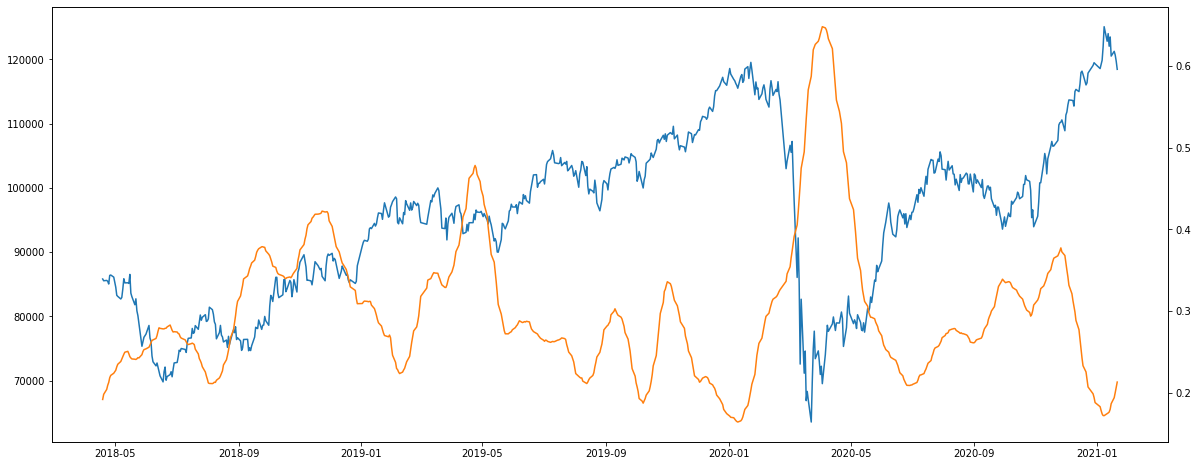

In [31]:
plt.figure()
grafico['Preço'].plot(figsize=(20,8))
grafico["Correlação Implícita"].plot(figsize=(20,8),secondary_y=True)
plt.plot()

Observe que o indicador de correlação implícita é de certa forma contra intuitivo. Quando está em patamares extremamente baixos, pode ser um indicador de que o risco está aumentando, ao passo que valores muito elevados indicam situações de fundo de mercado (bons momentos de compra).